<h1>A script to predict the closing price of Gold ETF</h1>
<h4>Author: Meron Habtemichael</h4>

<ul>
<i><h4>DataSet: <a href="https://www.kaggle.com/datasets/saikumartamminana/gold-price-prediction" > Link to Kaggle </a></h4></i>   
<i><h4>Report : <a href="https://hkrse-my.sharepoint.com/:w:/g/personal/meron_habtemichael0021_stud_hkr_se/EeEu4HqLShdPh7jLvDH5SwYBl-m8WHPNtyKyvGQDv6IUag?e=h8uc5l" > Link to Ms Word Report </a></h4></i>

<ul>


---

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import datetime
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Datasets/Gold_price.csv")

In [190]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0


**Note that**: <br> *we can immediately observe that we need to encode the date, and scale/stardardize the values of our features. <br> but first lets visualize our data.*


In [191]:
#sns.stripplot(x="Date", y="Close/Last", data=df,jitter=True,palette='Set1')

In [192]:
#sns.barplot(x="day", y="area",data=df, estimator=np.mean)

---

# Data visiualization/analysis

In [193]:
df.shape    # Lets see and determine the shape of the dataset

(2547, 6)

In [194]:
df.isnull().sum()    # Check if we have missing values

Date           0
Close/Last     0
Volume        39
Open           0
High           0
Low            0
dtype: int64

In [195]:
df.dropna(inplace = True, axis = 0)     # Drop the null entries from the dataset ( volume has missing values)

In [196]:
df.dtypes     # Lets see the datatype of each feature

Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

We can easly point out that the date feature is not in appropriate format. <br>
We can use Pandas built in feature to deal with time-series data but first, <br>
lets ensure the 'Date' column is of type 'datetime64'.

In [197]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2022-10-28,1648.3,186519.0,1667.2,1670.9,1640.7
1,2022-10-27,1668.8,180599.0,1668.8,1674.8,1658.5
2,2022-10-26,1669.2,183453.0,1657.7,1679.4,1653.8
3,2022-10-25,1658.0,178706.0,1654.5,1666.8,1641.2
4,2022-10-24,1654.1,167448.0,1662.9,1675.5,1648.0


<h4>Lets see the time interval of the whole dataset ie min and max time</h4>

In [198]:
print('Latest time: ', df['Date'].max())
print('Earliest time: ', df['Date'].min())

Latest time:  2022-10-28 00:00:00
Earliest time:  2012-10-31 00:00:00


***Lets quickly see the how the ETF performed in the last two months***

In [199]:
df.iloc[-90:].describe().astype(int)   

,Close/Last,Volume,Open,High,Low
count,90,90,90,90,90
mean,1669,138715,1671,1679,1659
std,49,41561,48,47,49
min,1572,40829,1564,1582,1554
25%,1649,112521,1655,1663,1641
50%,1674,135184,1674,1684,1663
75%,1711,163687,1712,1718,1700
max,1751,241179,1751,1755,1746


So in the last two months (90 trading days), <br>
we can see the average price is 1669 which is more that what it is currently trading at 1648 <br>
and so on ... <br>
The maximum volume traded in a single day was 241179, which is a huge number.

***So inorder to make ploting easier, Lets make the default index the 'Date' column*** <br>
This makes the ploting easier

In [200]:
df.index = df['Date']

<AxesSubplot:xlabel='Date'>

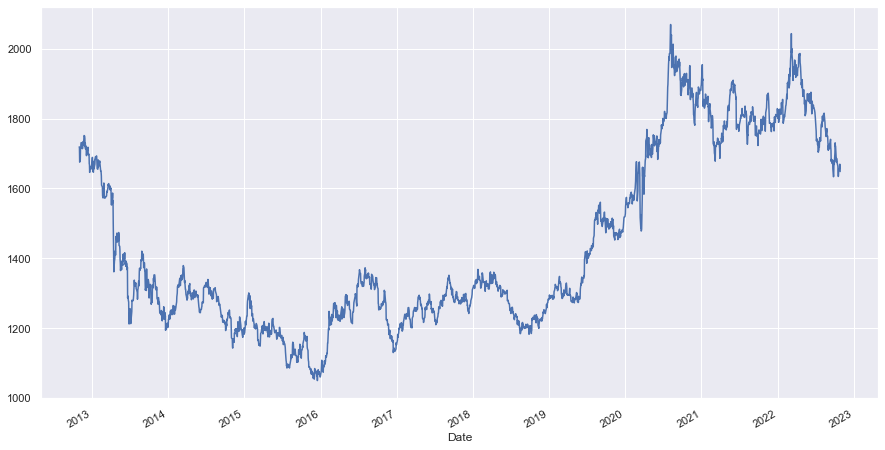

In [201]:
df['Close/Last'].plot(figsize = (15,8))   # Visualizing the closing Price (Target) over a period of time

***Daily percentage price*** <br>
This indicator shows the percentage increase/decrease of the daily price in respect to the previous day. <br>
Lets make a column for this and calculate it.
This could highly contribute to our models performance. <br>
But before doing that lets sort it in increasing date!


In [215]:
df.sort_index(inplace=True)

In [216]:
df['Day%_Change'] = df['Close/Last'].pct_change()*100
df.head()

,Date,Close/Last,Volume,Open,High,Low,Day%_Change
Date,,,,,,,
2012-10-31,2012-10-31,1719.1,110928.0,1710.3,1726.6,1709.8,NaN
2012-11-01,2012-11-01,1715.5,105904.0,1720.4,1727.5,1715.1,-0.209412
2012-11-02,2012-11-02,1675.2,205777.0,1715.6,1717.2,1674.8,-2.349169
2012-11-05,2012-11-05,1683.2,109647.0,1676.7,1686.2,1672.5,0.477555
2012-11-06,2012-11-06,1715.0,163585.0,1685.4,1720.9,1683.5,1.889259


***So*** , we can see the missing first value because we dont have information for the previous day. <br>
Lets just drop it

In [220]:
df.dropna(axis = 0, inplace = True)
df.head(2)

,Date,Close/Last,Volume,Open,High,Low,Day%_Change
Date,,,,,,,
2012-11-01,2012-11-01,1715.5,105904.0,1720.4,1727.5,1715.1,-0.209412
2012-11-02,2012-11-02,1675.2,205777.0,1715.6,1717.2,1674.8,-2.349169


Date          datetime64[ns]
Close/Last           float64
Volume               float64
Open                 float64
High                 float64
Low                  float64
dtype: object

In [110]:
he = df.drop(columns=['Date'], axis="1")
corr = he.corr()
corr

,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,0.063957,0.998703,0.999334,0.999420
Volume,0.063957,1.000000,0.068945,0.072961,0.058990
Open,0.998703,0.068945,1.000000,0.999272,0.999142
High,0.999334,0.072961,0.999272,1.000000,0.998895
Low,0.999420,0.058990,0.999142,0.998895,1.000000


<AxesSubplot:>

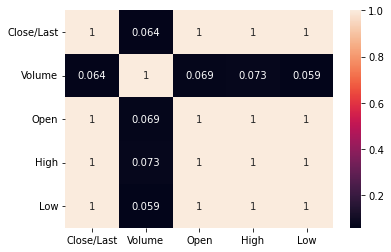

In [111]:
sns.heatmap(corr, annot=True)

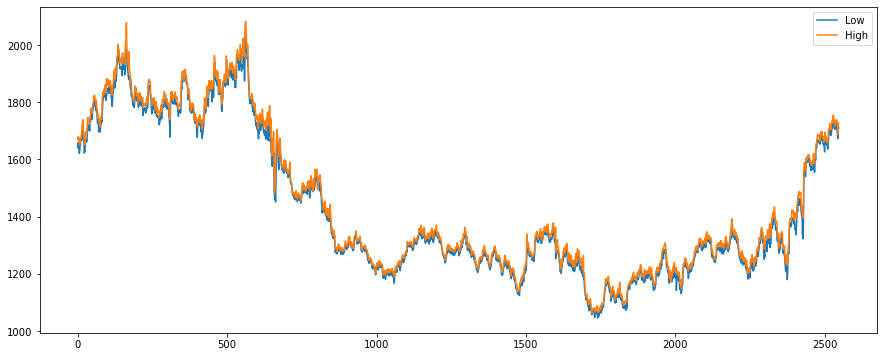

In [116]:
df.Low.plot(figsize=(15,6))
df.High.plot()
#df.Open.plot()
plt.legend(['Low','High','Open'])

---

# Encoding Date and Month features using OrdinalEncoder

In [47]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df["Date"] = enc.fit_transform(df[["Date"]])

In [122]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0


---

# StardardScaler

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [117]:
df = df[np.isfinite(df).all(1)]
scaled_features = scaler.fit_transform(df.drop(["Close/Last"], axis="columns"))
df_featured = pd.DataFrame(scaled_features, columns=df.drop(["Close/Last"], axis=1).columns)
df_featured.head()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

---

# Splitting the data

In [118]:
from sklearn.model_selection import train_test_split
x=df_featured
y=df["Close/Last"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [2508, 2547]

---

# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
x_train.head()

,Date,Volume,Open,High,Low
2246,1.335826,-0.872961,-0.639175,-0.659397,-0.633836
1225,1.517167,0.904227,-0.738482,-0.751491,-0.726676
1742,1.338552,-0.126593,-1.400527,-1.400786,-1.419439
1559,0.385486,0.470179,-0.367737,-0.333202,-0.357282
117,-0.514406,0.127625,1.731335,1.690915,1.659637


In [120]:
from sklearn.metrics import mean_absolute_error, r2_score
r2_score(y_test, y_pred)

0.9995080484833534

---

# RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(random_state=42) 
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)
r2_score( y_test, y_pred2)

0.9990615408152974